In [5]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/40/e5/78afab229ccdaf6b947036440799dbdf88e2cd632e2f96b81f32de8aa05a/pmdarima-2.0.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/b6/83/b0a63fc7b315edd46821a1a381d18765c1353d201246da44558175cddd56/Cython-3.0.10-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 7.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.6 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for cmdstanpy==0.9.5 from https://files.pythonhosted.org/packages/e3/e2/204c9c6beaf9e05ad28bd589c154afff35dffa6166d76841d3c0dec6c1e3/cmdstanpy-0.9.5-py3-none-any.whl.metadata
  Obtaining dependency information for pystan>=2.14 from https://files.pythonhosted.org/packages/20/e7/726e923d328524d0151080f5a1d20f57a025b6d2f72a252c2d2d7abe57f9/pystan-3.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for LunarCalendar>=0.0.9 from https://files.pythonhosted.org/packages/ab/e0/a52ffc02395474858552ca6437226e23ad67e25fd85cb387f02e479cfe01/LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata
  Obtaining dependency information for convertdate>=2.1.2 from https://files.pythonhosted.org/packages/27/65/3deecc820ce91716225ec72b584b48ba9512ed9583ad48619e3dbbbbd714/convertdate-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency informa

  Obtaining dependency information for pystan>=2.14 from https://files.pythonhosted.org/packages/20/2b/47f388887cd3c29dcaa2b08bec9de56e31103439ff0ae644e6191b0be842/pystan-3.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for pystan>=2.14 from https://files.pythonhosted.org/packages/7d/b2/7aca7cec913d1e1164a47f1cb2ea719b94ed7a1f016a8b8ccf5d0c62e02c/pystan-3.0.1-py3-none-any.whl.metadata
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Obtaining dependency information for pystan>=2.14 from https://files.pythonhosted.org/packages/16/7d/fe5d4cb464497f5a092847b7a7f4f308786981a58fcf0a619e8492057f01/pystan-3.0.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 27.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━

In [7]:
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
#os.chdir('data')
#from colorsetup import colors, palette
#sns.set_palette(palette)
import warnings
warnings.simplefilter(action='ignore')
#import fbprophet
import pmdarima as pm

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
df = pd.read_csv("timefinal.csv",
                skipfooter=2,
                infer_datetime_format=True,
                header=0,
                index_col=0, engine='python',
                names=['month', 'CO2'])
df.index = pd.to_datetime(df.index)

In [12]:
df.head()

,CO2
month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


In [13]:
df.describe()

,CO2
count,192.000000
mean,328.463958
std,5.962682
min,317.250000
25%,323.397500
50%,328.295000
75%,333.095000
max,341.190000


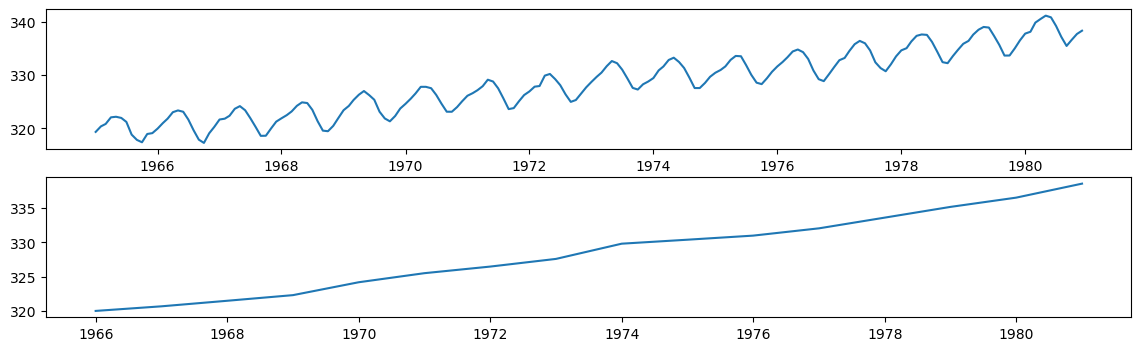

In [17]:
#annual
plt.rcParams['figure.figsize'] = [14,4]
annual_co2 = df.resample('A').mean()
fig, axes = plt.subplots(2,1)
axes[0].plot(df)
axes[1].plot(annual_co2)

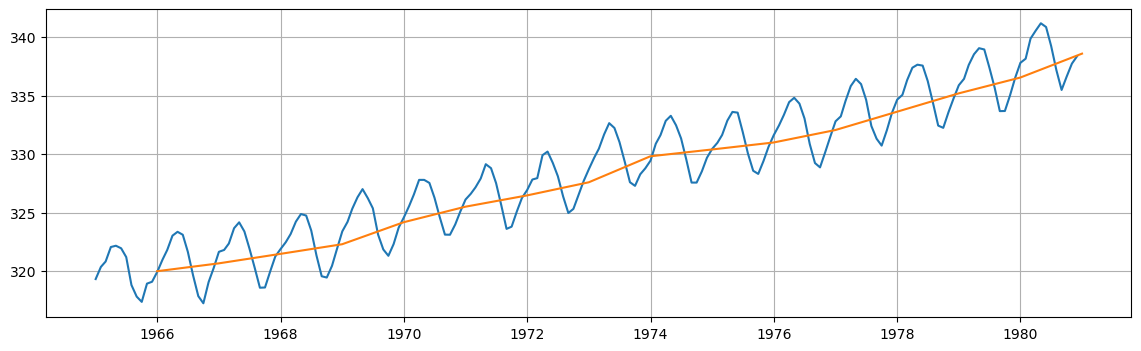

In [37]:
plt.plot(df)
plt.plot(annual_co2)
plt.grid(True);

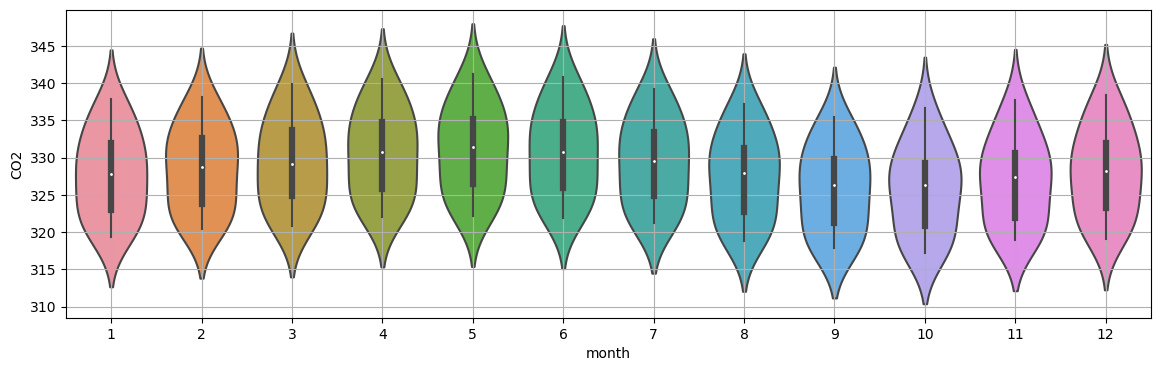

In [25]:
sns.violinplot(x=df.index.month, y=df.CO2)
plt.grid(True);

Test Statistic            1.269677
p-value                   0.996434
Lags Used                12.000000
Observations Used       179.000000
Critical Value (1%)      -3.467420
Critical Value (5%)      -2.877826
Critical Value (10%)     -2.575452
dtype: float64


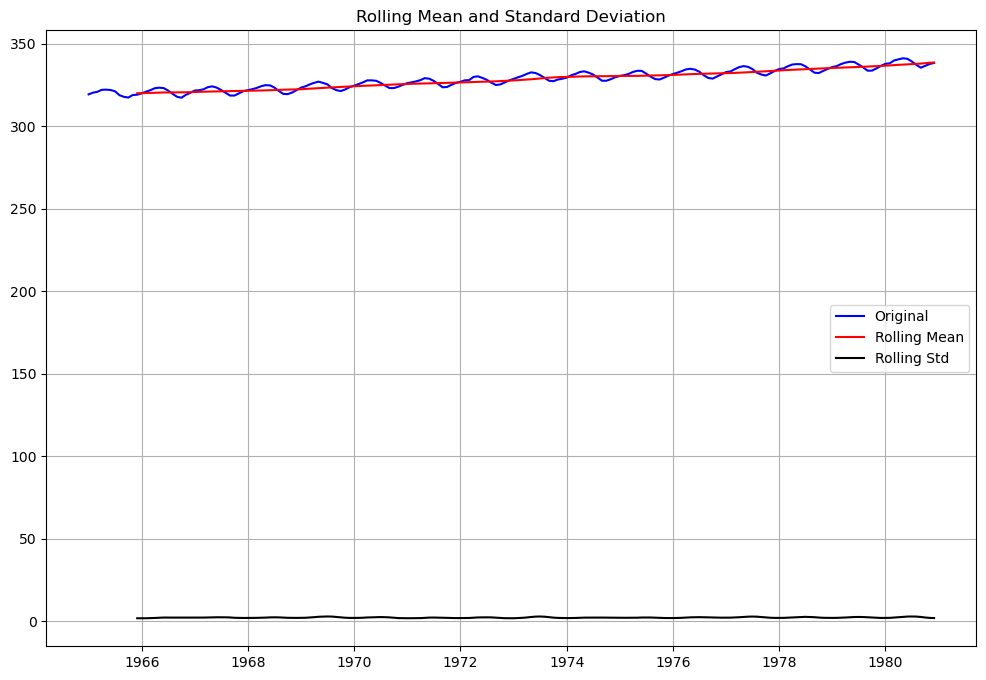

In [34]:
#stationary
def dftest(timeseries):
    dftest = ts.adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plotting
    plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show()

dftest(df['CO2'])

Test Statistic            1.269677
p-value                   0.996434
Lags Used                12.000000
Observations Used       179.000000
Critical Value (1%)      -3.467420
Critical Value (5%)      -2.877826
Critical Value (10%)     -2.575452
dtype: float64


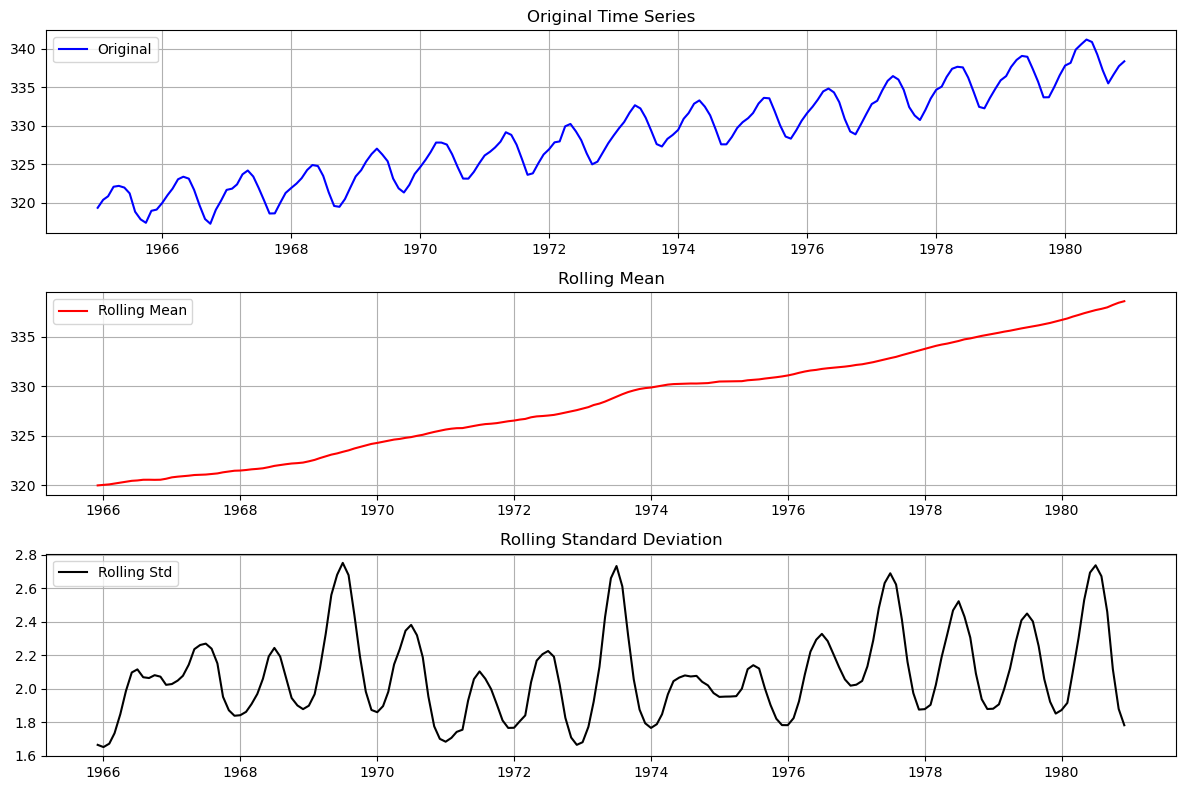

In [36]:
# seperate original time series, rolling mean, and rolling std because it does not look too well combined in one visualization
def dftest(timeseries):
    dftest = ts.adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Plot original time series
    plt.subplot(3, 1, 1)
    plt.plot(timeseries, color='blue', label='Original')
    plt.legend(loc='best')
    plt.title('Original Time Series')
    plt.grid()
    
    # Plot rolling mean
    plt.subplot(3, 1, 2)
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.grid()
    
    # Plot rolling standard deviation
    plt.subplot(3, 1, 3)
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Standard Deviation')
    plt.grid()
    
    plt.tight_layout()
    plt.show()


dftest(df['CO2'])


Test Statistic           1.406138
p-value                  0.997142
Lags Used                0.000000
Observations Used       15.000000
Critical Value (1%)     -3.964443
Critical Value (5%)     -3.084908
Critical Value (10%)    -2.681814
dtype: float64


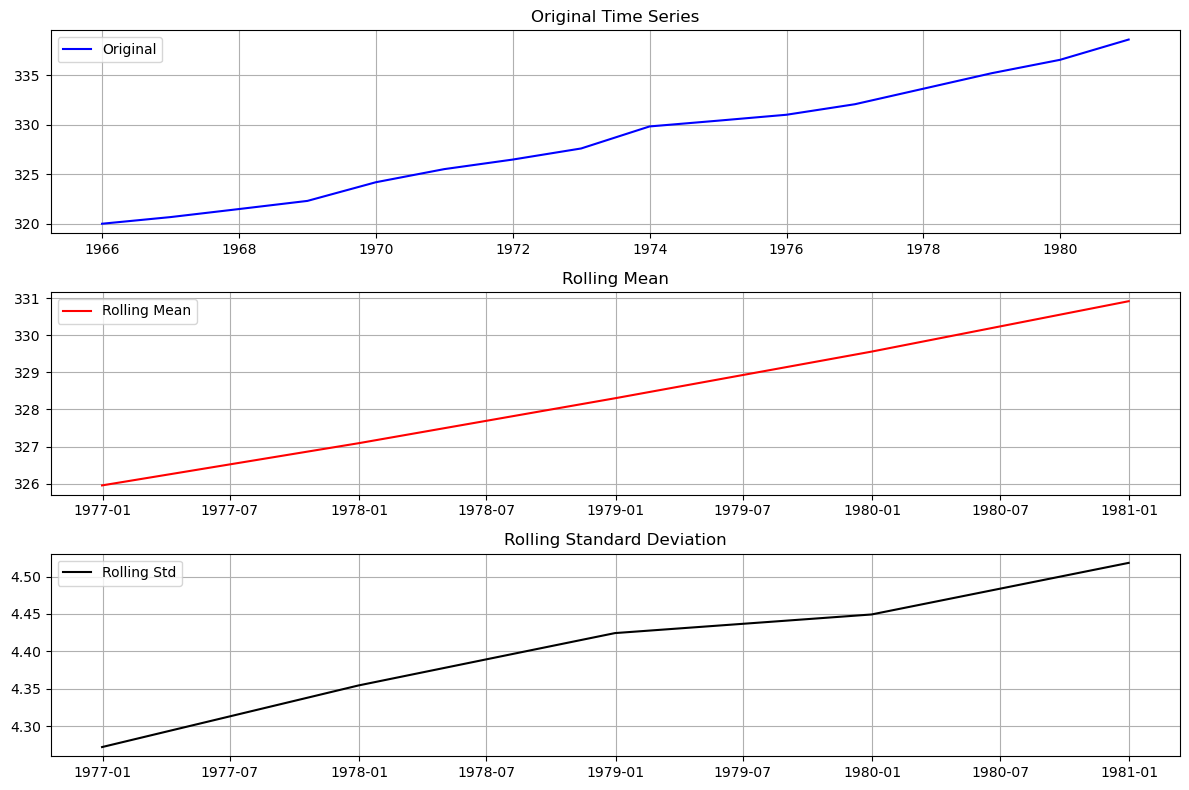

In [38]:
#annual
dftest(annual_co2)

Test Statistic           1.406138
p-value                  0.997142
Lags Used                0.000000
Observations Used       15.000000
Critical Value (1%)     -3.964443
Critical Value (5%)     -3.084908
Critical Value (10%)    -2.681814
dtype: float64


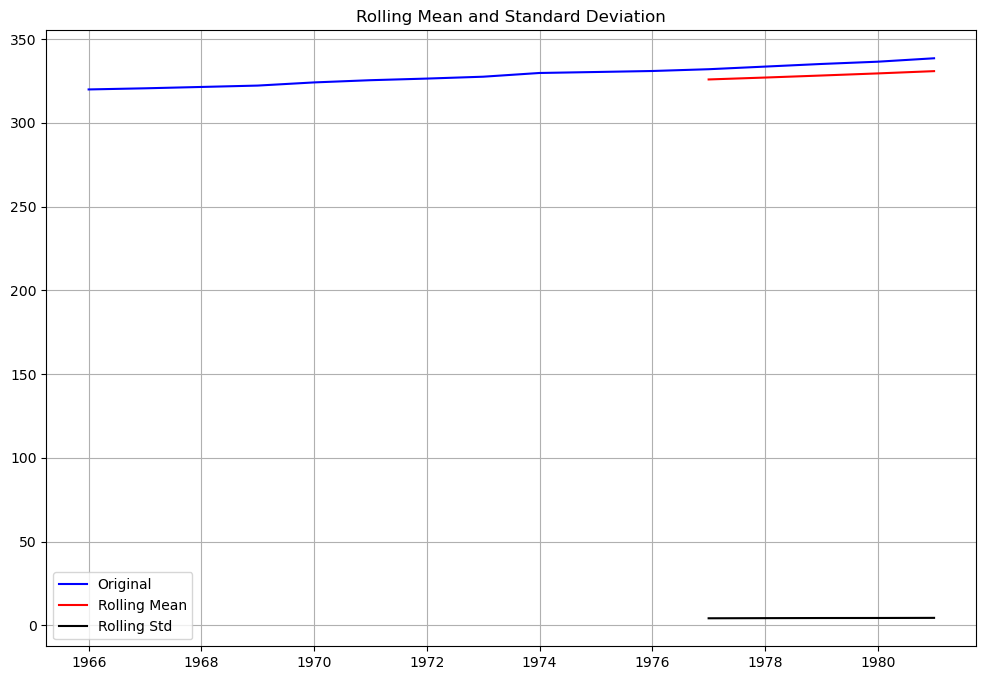

In [39]:
#combined in one graph
def dftest(timeseries):
    dftest = ts.adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plotting
    plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show()
dftest(annual_co2['CO2'])

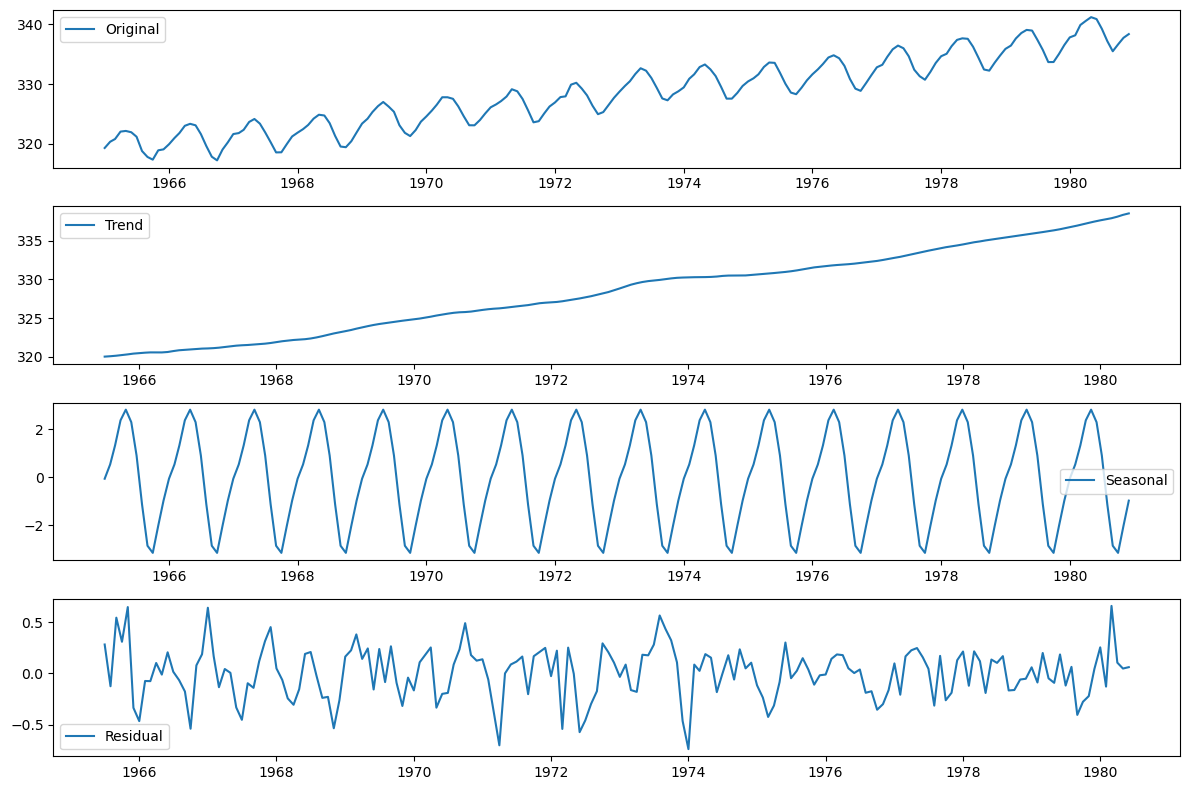

In [40]:
#decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['CO2'], model='additive', period=12)  # Assuming monthly seasonality
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(411)
plt.plot(df['CO2'], label='Original')
plt.legend()

# Trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

# Residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
#sarima
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

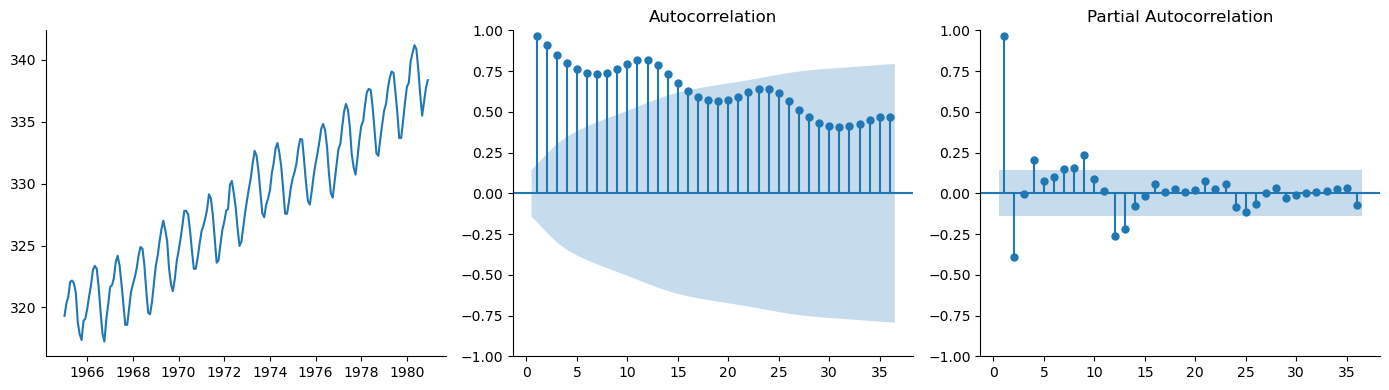

In [42]:
plots(df.CO2, lags=36);

In [66]:
sar = sm.tsa.statespace.SARIMAX(df['CO2'], 
                                order=(5, 0, 0), 
                                seasonal_order=(0, 1, 1, 12), 
                                trend='c').fit(maxiter=1000, method='powell')


Optimization terminated successfully.
         Current function value: 0.271107
         Iterations: 20
         Function evaluations: 1817


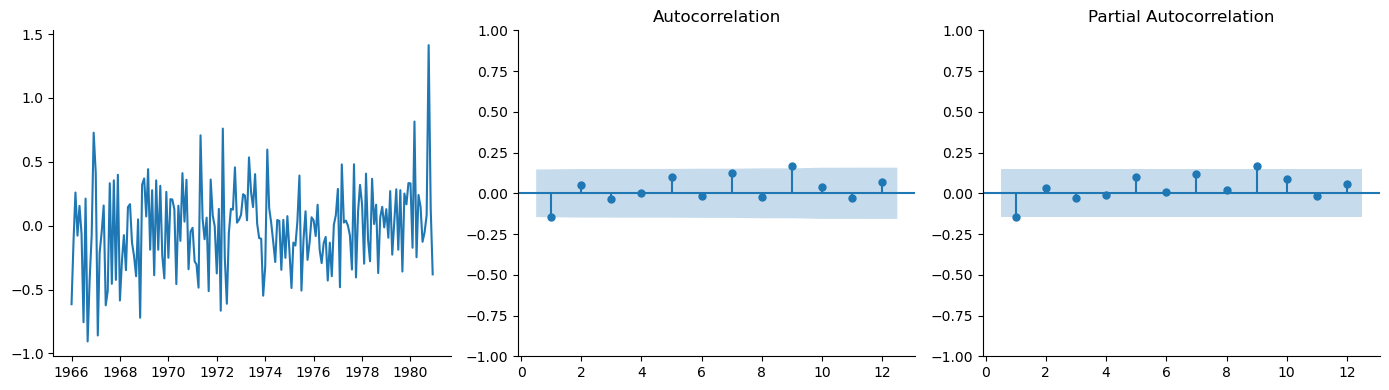

In [51]:
#residuals
plots(sar.resid[sar.loglikelihood_burn:], lags=12);

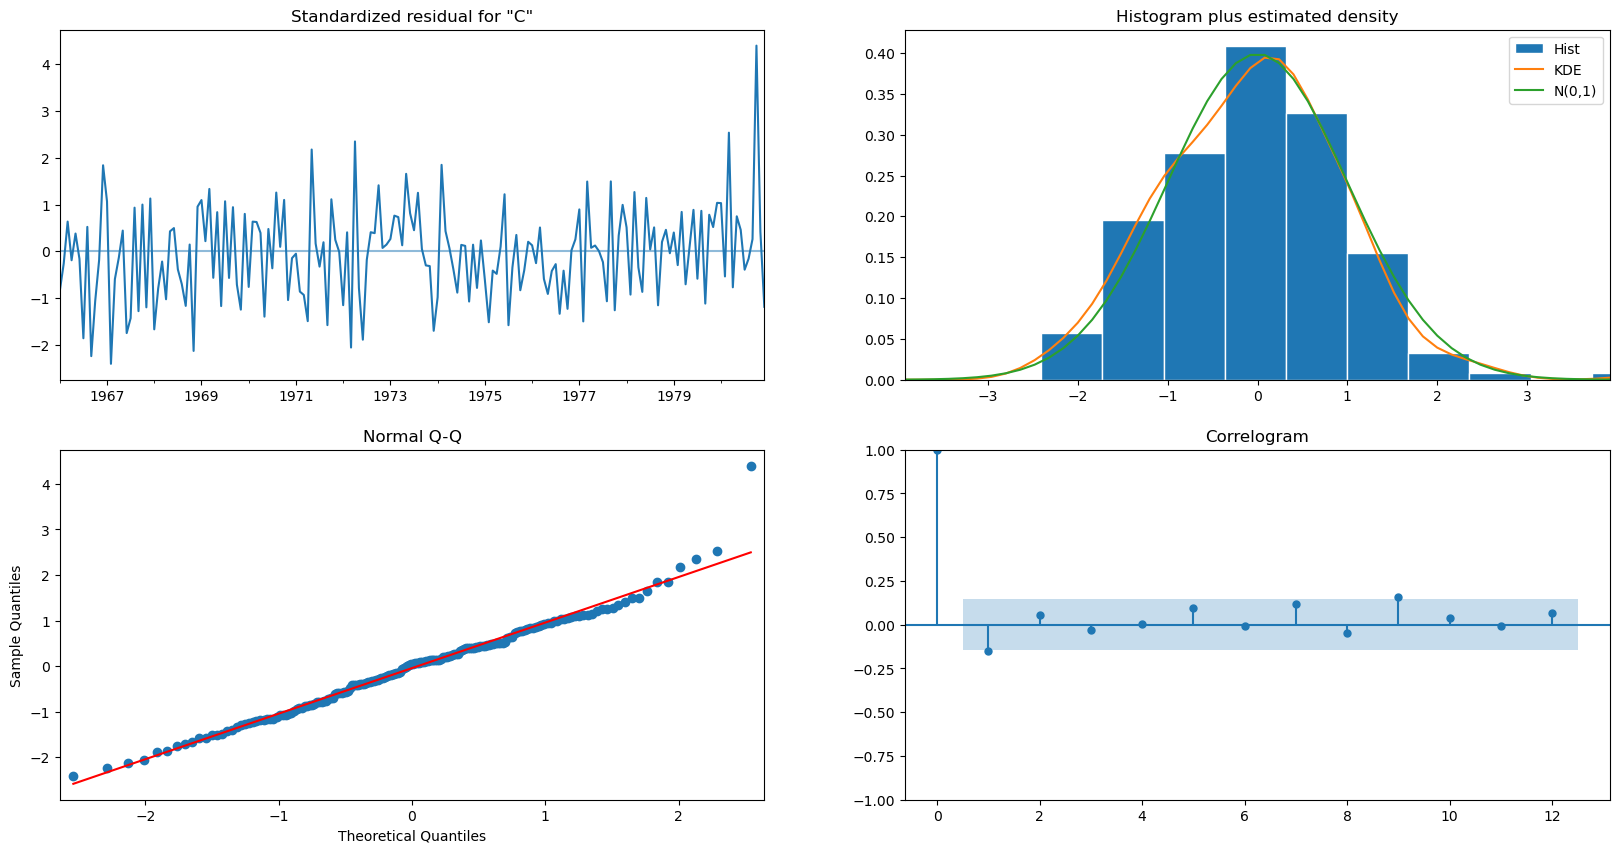

In [52]:
#residual diagnostics 
sar.plot_diagnostics(lags=12,figsize = (20,10),);

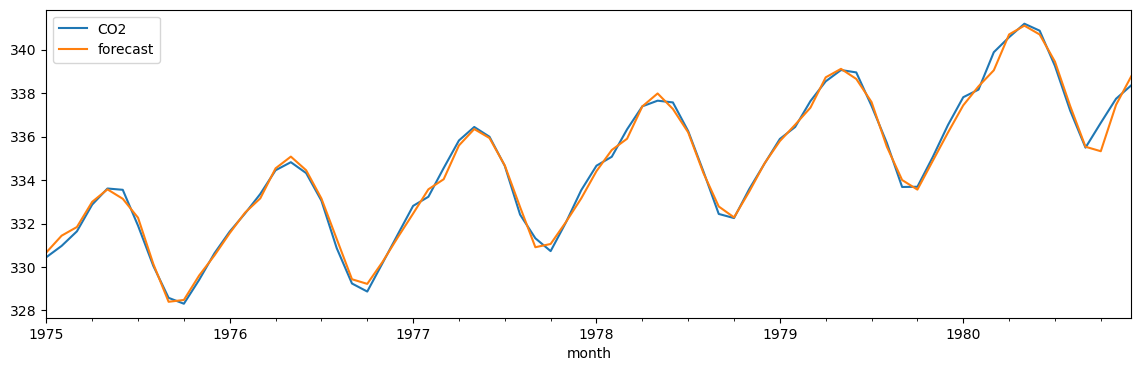

In [67]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
df['forecast'] = sar.predict(start = 100, end= 192)  
df[120:][['CO2', 'forecast']].plot();

In [57]:
sar2 = sm.tsa.statespace.SARIMAX(df['CO2'], 
                                  order=(3, 0, 0), 
                                  seasonal_order=(0, 1, 1, 12), 
                                  trend='c').fit(maxiter=1000, method='powell')

Optimization terminated successfully.
         Current function value: 0.280525
         Iterations: 12
         Function evaluations: 877


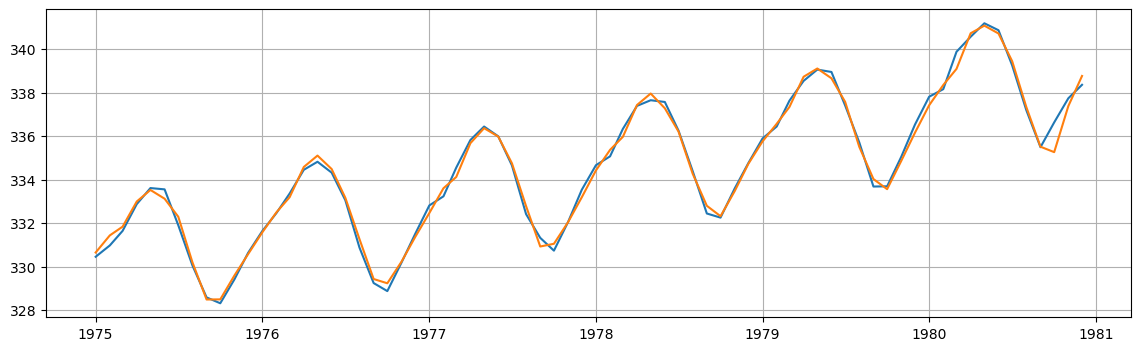

In [63]:
df['forecast'] = sar2.predict(start = 0, end= 192, dynamic=False)  
plt.plot(df[120:][['CO2', 'forecast']])
plt.grid();